## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import statsmodels.api as sm

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from imblearn.over_sampling import SMOTENC
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,  roc_auc_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
df = pd.read_csv("amex_credit_card.csv")
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

In [3]:
df.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [4]:
df.shape

(45528, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

## Checking for duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicate rows.

## Checking for missing values

In [7]:
df.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [8]:
print("Percentage of missing values in owns_car column:", df["owns_car"].isnull().mean() * 100)
print("Percentage of missing values in no_of_children column:", df["no_of_children"].isnull().mean() * 100)
print("Percentage of missing values in no_of_days_employed  column:", df["no_of_days_employed"].isnull().mean() * 100)
print("Percentage of missing values in total_family_members column:", df["total_family_members"].isnull().mean() * 100)
print("Percentage of missing values in migrant_worker column:", df["migrant_worker"].isnull().mean() * 100)
print("Percentage of missing values in yearly_debt_payments column:", df["yearly_debt_payments"].isnull().mean() * 100)
print("Percentage of missing values in credit_score column:", df["credit_score"].isnull().mean() * 100)

Percentage of missing values in owns_car column: 1.2014584431558601
Percentage of missing values in no_of_children column: 1.7000527148128626
Percentage of missing values in no_of_days_employed  column: 1.01695659813741
Percentage of missing values in total_family_members column: 0.18230539448251626
Percentage of missing values in migrant_worker column: 0.19109119662625199
Percentage of missing values in yearly_debt_payments column: 0.2086628009137234
Percentage of missing values in credit_score column: 0.017571604287471447


In [9]:
df = df.dropna(subset = ['migrant_worker'])
df = df.dropna(subset = ['yearly_debt_payments'])
df = df.dropna(subset = ['total_family_members'])
df = df.dropna(subset = ['credit_score'])
df.shape

(45256, 19)

## Data Summary

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45256.0,38.992134,9.543420,23.00,31.0000,39.00,47.0000,5.500000e+01
no_of_children,44485.0,0.420614,0.723805,0.00,0.0000,0.00,1.0000,9.000000e+00
net_yearly_income,45256.0,200757.911472,671038.229146,27170.61,126367.9975,171739.43,240771.1525,1.407590e+08
no_of_days_employed,44795.0,67581.018908,139300.032687,2.00,936.0000,2224.00,5813.0000,3.652520e+05
total_family_members,45256.0,2.158034,0.911481,1.00,2.0000,2.00,3.0000,1.000000e+01
migrant_worker,45256.0,0.179070,0.383415,0.00,0.0000,0.00,0.0000,1.000000e+00
yearly_debt_payments,45256.0,31806.502776,17274.536429,2237.47,19234.6900,29093.34,40573.7050,3.281129e+05
credit_limit,45256.0,43567.052942,149218.863990,4003.14,23975.9725,35692.71,53445.0500,3.112997e+07
credit_limit_used(%),45256.0,52.261181,29.381911,0.00,27.0000,54.00,79.0000,9.900000e+01
credit_score,45256.0,782.842231,100.636911,500.00,704.0000,786.00,867.0000,9.490000e+02


# Data Cleaning & Feature Engineering

In [11]:
df = df.drop( columns = ['name', 'customer_id'])

## Target Variable
### credit_card_default column

In [12]:
print(df['credit_card_default'].value_counts(dropna = False))
print(f'The proportion of non-defaulters is {41663/(41663+3683)*100:.2f}%.')
print(f'The proportion of defaulters is {3683/(41663+3683)*100:.2f}%.')

credit_card_default
0    41581
1     3675
Name: count, dtype: int64
The proportion of non-defaulters is 91.88%.
The proportion of defaulters is 8.12%.


## Categorical columns

### gender column

In [13]:
df["gender"].value_counts()

gender
F      29779
M      15476
XNA        1
Name: count, dtype: int64

In [14]:
df = df[df['gender'] != 'XNA'] # Removing unknown gender entries

### owns_car column

In [15]:
df['owns_car'].value_counts(dropna = False)

owns_car
N      29551
Y      15161
NaN      543
Name: count, dtype: int64

In [16]:
# Imputation with mode
df['owns_car'] = df['owns_car'].fillna(df['owns_car'].mode()[0])

### owns_house column

In [17]:
df['owns_house'].value_counts(dropna = False)

owns_house
Y    31452
N    13803
Name: count, dtype: int64

<Axes: xlabel='owns_house', ylabel='count'>

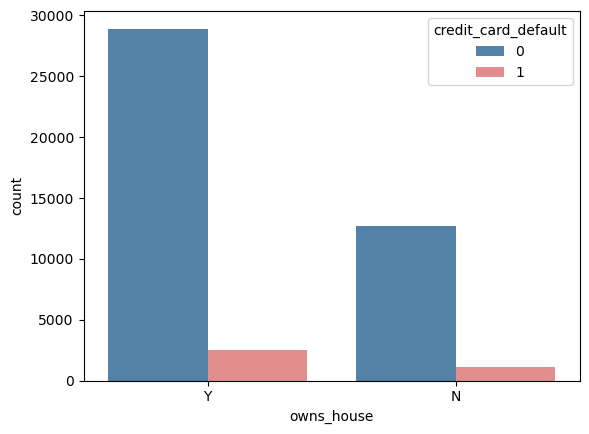

In [18]:
sns.countplot(x = 'owns_house', hue = 'credit_card_default', data = df, palette = ['steelblue', 'lightcoral'])

### occupation_type column

In [19]:
df['occupation_type'].value_counts(dropna=False)

occupation_type
Unknown                  14207
Laborers                  8085
Sales staff               4683
Core staff                4046
Managers                  3152
Drivers                   2733
High skill tech staff     1667
Accountants               1468
Medicine staff            1268
Security staff            1023
Cooking staff              897
Cleaning staff             663
Private service staff      387
Low-skill Laborers         334
Waiters/barmen staff       202
Secretaries                197
Realty agents              100
HR staff                    78
IT staff                    65
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='occupation_type'>

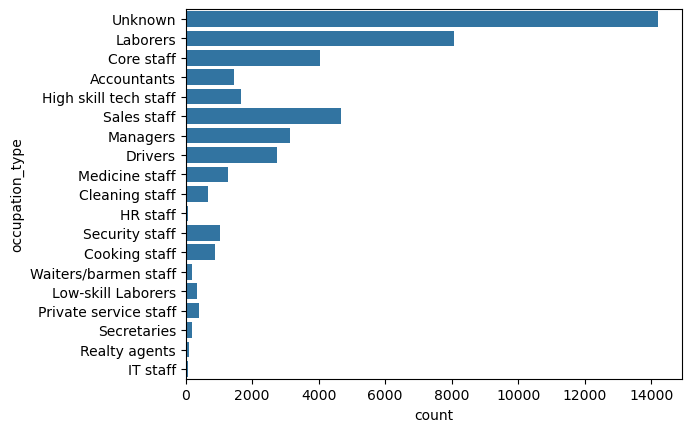

In [20]:
sns.countplot(df['occupation_type'])

In [21]:
default_rates = df.groupby('occupation_type')['credit_card_default'].mean().sort_values(ascending = True)
print(default_rates)
occupation_mapping = default_rates.rank(method="first").astype(int) - 1
df['occupation'] = df['occupation_type'].map(occupation_mapping)

occupation_type
IT staff                 0.030769
Secretaries              0.040609
Accountants              0.053134
Core staff               0.059812
High skill tech staff    0.062388
Unknown                  0.064194
Managers                 0.067259
Private service staff    0.074935
Medicine staff           0.078076
HR staff                 0.089744
Sales staff              0.097160
Realty agents            0.100000
Cleaning staff           0.102564
Security staff           0.103617
Waiters/barmen staff     0.103960
Laborers                 0.104886
Cooking staff            0.112598
Drivers                  0.117087
Low-skill Laborers       0.158683
Name: credit_card_default, dtype: float64


In [22]:
df['occupation'].value_counts()

occupation
5     14207
15     8085
10     4683
3      4046
6      3152
17     2733
4      1667
2      1468
8      1268
13     1023
16      897
12      663
7       387
18      334
14      202
1       197
11      100
9        78
0        65
Name: count, dtype: int64

### total_family_members

In [23]:
df['total_family_members'].value_counts(dropna = False)

total_family_members
2.0     23350
1.0      9876
3.0      7780
4.0      3612
5.0       560
6.0        57
7.0        11
8.0         6
10.0        2
9.0         1
Name: count, dtype: int64

<Axes: xlabel='total_family_members'>

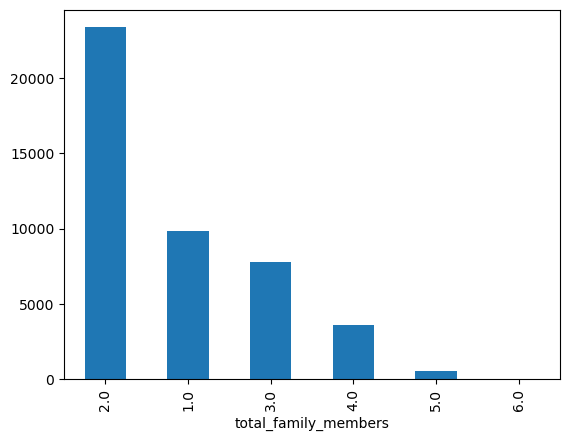

In [24]:
df = df[df['total_family_members'] < 7]
df['total_family_members'].value_counts().plot(kind = 'bar')

### migrant_worker

In [25]:
df['migrant_worker'].value_counts()

migrant_worker
0.0    37138
1.0     8097
Name: count, dtype: int64

### prev_defaults

In [26]:
df['prev_defaults'].value_counts(dropna = False)

prev_defaults
0    42780
1     2163
2      292
Name: count, dtype: int64

### default_in_last_6months column

In [27]:
df['default_in_last_6months'].value_counts()

default_in_last_6months
0    42947
1     2288
Name: count, dtype: int64

### no_of_children column

In [28]:
df["no_of_children"].value_counts(dropna=False)

no_of_children
0.0    31051
1.0     8934
2.0     3839
NaN      771
3.0      579
4.0       60
5.0        1
Name: count, dtype: int64

In [29]:
df = df[df['no_of_children']<6]

KNN Imputer is used because the number of children is closely related to other features like age, marital status, and family size. By using nearest neighbors, the imputed values are influenced by similar individuals in the dataset, leading to more realistic estimates than simply filling with mean or mode.


In [30]:
imputer = KNNImputer(n_neighbors=5)
df[['no_of_children']] = imputer.fit_transform(df[['no_of_children']])
# Round to nearest integer (children can't be fractional)
df['no_of_children'] = df['no_of_children'].round().astype(int)

df["no_of_children"].value_counts(dropna=False)

no_of_children
0    31051
1     8934
2     3839
3      579
4       60
5        1
Name: count, dtype: int64

## Numerical columns

### age column

In [31]:
df['age'].value_counts()

age
55    1415
40    1414
36    1385
49    1380
35    1380
23    1375
48    1373
37    1372
29    1370
53    1365
27    1364
26    1361
45    1356
30    1355
31    1347
32    1345
43    1345
54    1345
46    1343
50    1342
28    1339
51    1336
24    1335
25    1330
41    1330
42    1323
44    1318
34    1316
52    1316
39    1313
33    1302
38    1291
47    1283
Name: count, dtype: int64

### net_yearly_income column

<Axes: xlabel='net_yearly_income', ylabel='Density'>

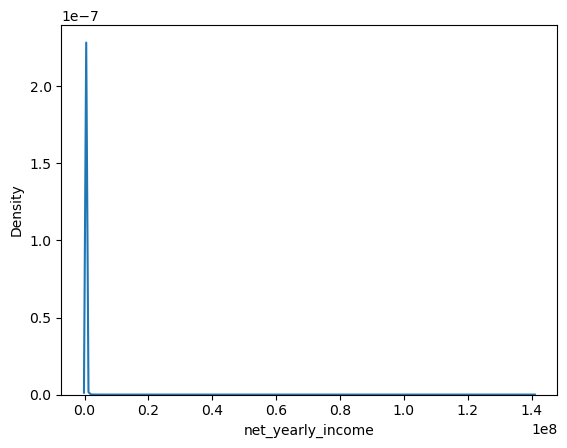

In [32]:
sns.kdeplot(df['net_yearly_income'])

<Axes: xlabel='credit_card_default', ylabel='net_yearly_income'>

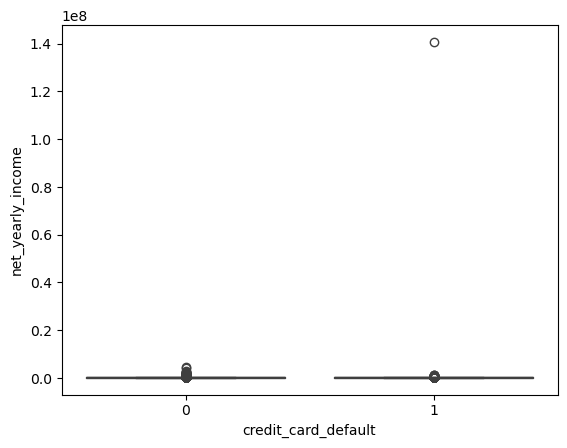

In [33]:
sns.boxplot(x='credit_card_default', y='net_yearly_income', data=df)

In [34]:
df = df[df['net_yearly_income'] != df['net_yearly_income'].max()]

<Axes: xlabel='credit_card_default', ylabel='net_yearly_income'>

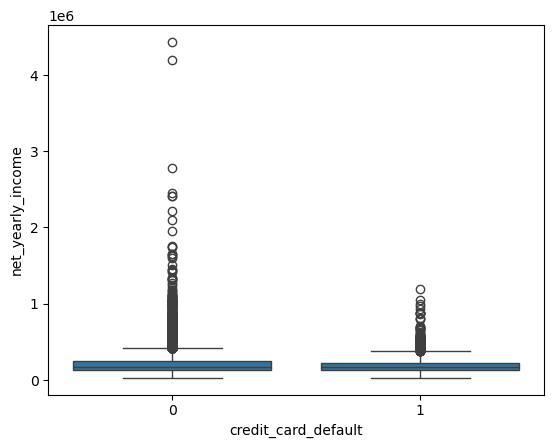

In [35]:
sns.boxplot(x='credit_card_default', y='net_yearly_income', data=df)

<Axes: xlabel='net_yearly_income', ylabel='Density'>

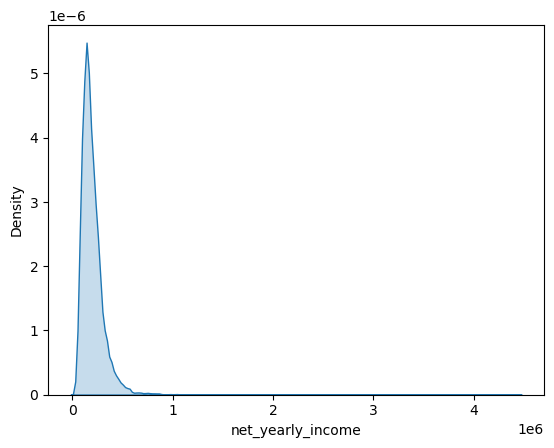

In [36]:
sns.kdeplot(df['net_yearly_income'], fill=True)

<Axes: xlabel='log_net_yearly_income', ylabel='Density'>

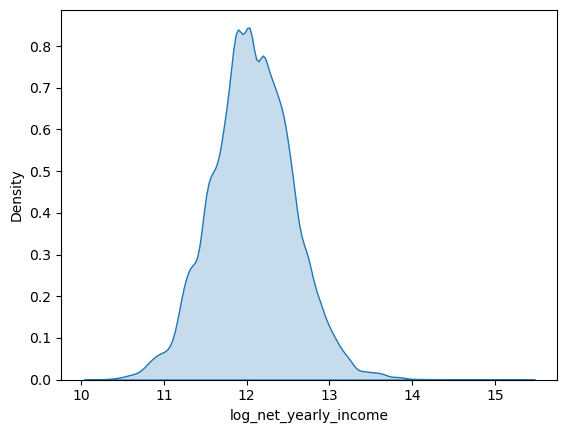

In [37]:
df['log_net_yearly_income'] = np.log1p(df['net_yearly_income'])
sns.kdeplot(df['log_net_yearly_income'], fill=True)

In [38]:
df['log_net_yearly_income'].skew()

np.float64(0.13840043431460303)

### no_of_days_employed column

<Axes: xlabel='no_of_days_employed', ylabel='Density'>

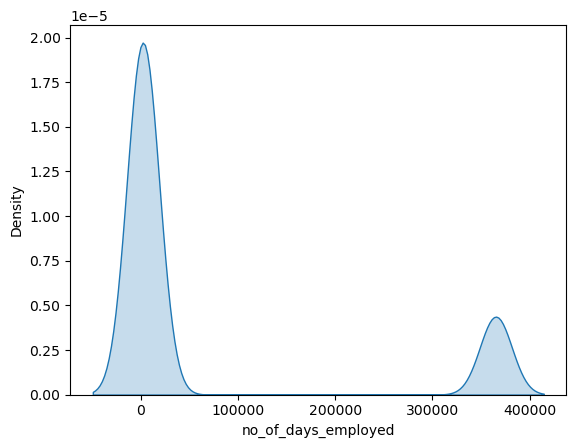

In [39]:
sns.kdeplot(df['no_of_days_employed'].dropna(), fill=True)

In [40]:
df[(df['age'] - 18)*365 < df['no_of_days_employed']]

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,occupation,log_net_yearly_income
3,39,F,N,Y,0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,3,11.714452
8,40,F,N,Y,0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0,15,12.255303
12,39,F,N,Y,0,68421.10,365247.0,Unknown,2.0,0.0,13781.53,17110.01,72,643.0,1,1,1,5,11.133451
16,24,F,N,Y,0,145522.37,8058.0,High skill tech staff,1.0,0.0,26365.91,29476.68,77,763.0,0,0,0,4,11.888092
23,23,F,N,Y,2,217697.92,4057.0,Drivers,4.0,0.0,27509.83,48384.25,84,519.0,2,0,1,17,12.290868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45510,38,F,N,Y,0,52827.82,365242.0,Unknown,2.0,0.0,19245.70,13756.60,13,907.0,0,0,0,5,10.874812
45512,24,F,N,Y,0,140729.06,365251.0,Unknown,2.0,0.0,18350.70,15661.53,27,752.0,0,0,0,5,11.854599
45513,49,M,N,Y,0,223193.44,365242.0,Unknown,2.0,0.0,19881.38,48985.19,72,940.0,0,0,0,5,12.315799
45514,30,F,Y,Y,0,259793.86,5372.0,Laborers,2.0,0.0,29352.66,82582.62,83,868.0,0,0,0,15,12.467648


In [41]:
df.shape

(44463, 19)

In [42]:
10536/44482*100

23.685985342385685

In [43]:
11487/44482*100

25.82392878018075

In [44]:
# droping rows where no_of_days_employed is more than possible days of employment
df = df[(df['age'] - 18)*365 >= df['no_of_days_employed']]
# converting days' data into years
df['years_experience'] = (df['no_of_days_employed'].abs()) / 365

<Axes: xlabel='years_experience', ylabel='Density'>

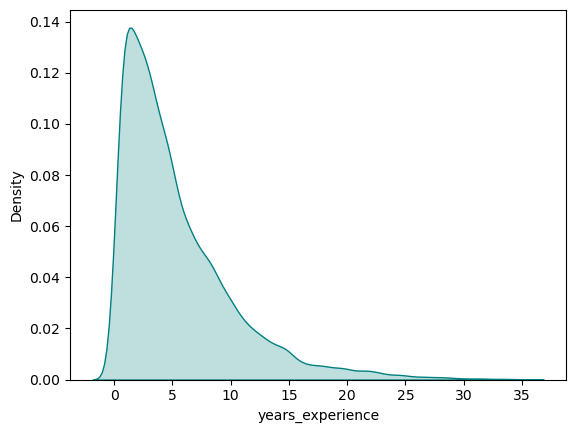

In [45]:
sns.kdeplot(df['years_experience'], color='teal', fill=True)

Skewness: 0.08150678241080431


<Axes: xlabel='years_experience_log', ylabel='Density'>

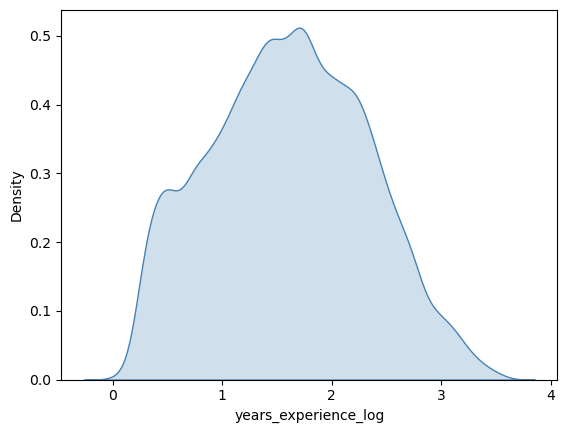

In [46]:
df['years_experience_log'] = np.log1p(df['years_experience'])  
print(f"Skewness: {df['years_experience_log'].skew()}")
sns.kdeplot(df['years_experience_log'], color='steelblue', fill=True)

### yearly_debt_payments column

1.7624838971406847


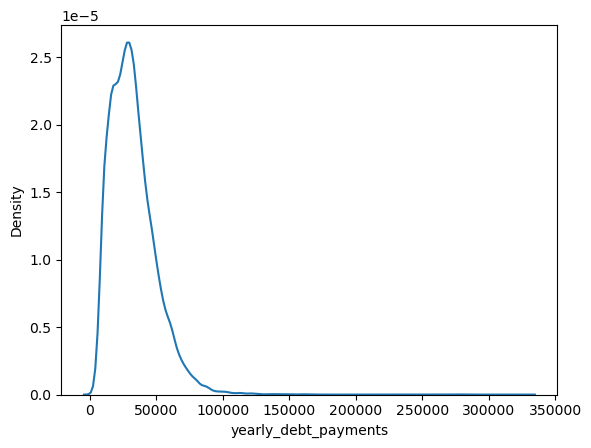

In [47]:
sns.kdeplot(df['yearly_debt_payments'])
print(df['yearly_debt_payments'].skew())

-0.35719825954985673


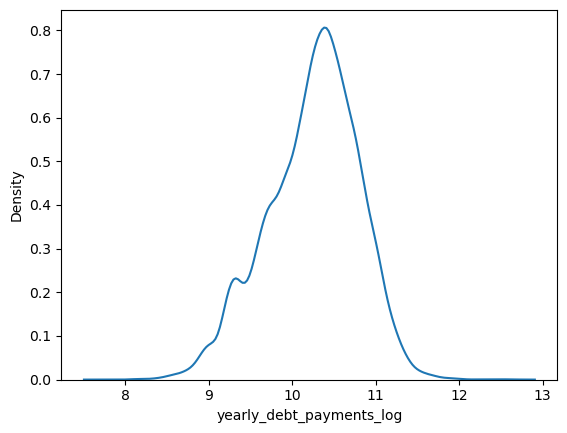

In [48]:
df['yearly_debt_payments_log'] = np.log1p(df['yearly_debt_payments'])
sns.kdeplot(df['yearly_debt_payments_log'])
print(df['yearly_debt_payments_log'].skew())

### credit_limit column

4.764310914716553


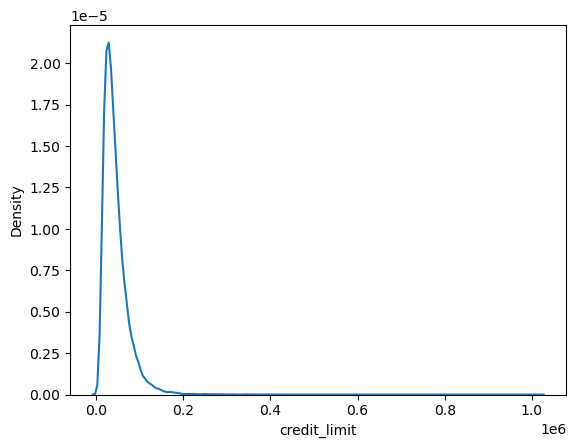

In [49]:
sns.kdeplot(df['credit_limit'])
print(df['credit_limit'].skew())

0.11148292124511365


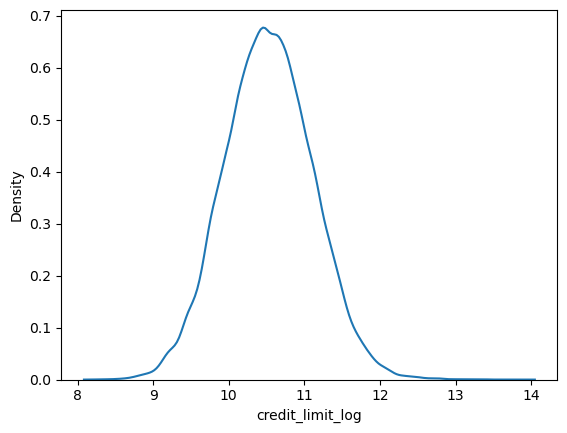

In [50]:
df['credit_limit_log'] = np.log1p(df['credit_limit'])
sns.kdeplot(df['credit_limit_log'])
print(df['credit_limit_log'].skew())

### credit_limit_used(%) column

-0.15155649903662405


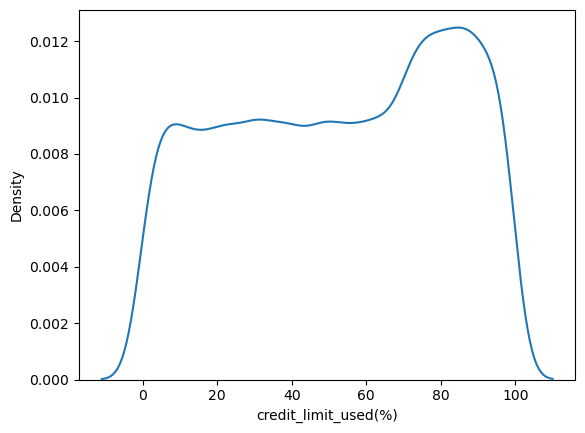

In [51]:
sns.kdeplot(df['credit_limit_used(%)'])
print(df['credit_limit_used(%)'].skew())

### credit_score column

-0.2980662134809937


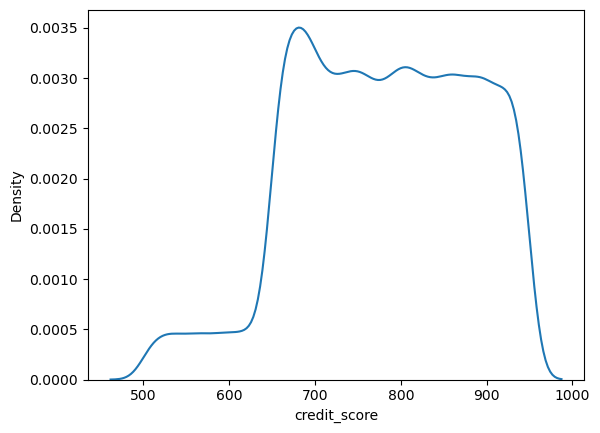

In [52]:
sns.kdeplot(df['credit_score'])
print(df['credit_score'].skew())

# EDA

## Categorical columns

In [53]:
cat_cols = ['gender', 'owns_car', 'owns_house', 'no_of_children', 'total_family_members',
            'migrant_worker', 'prev_defaults', 'default_in_last_6months', 'occupation_type']

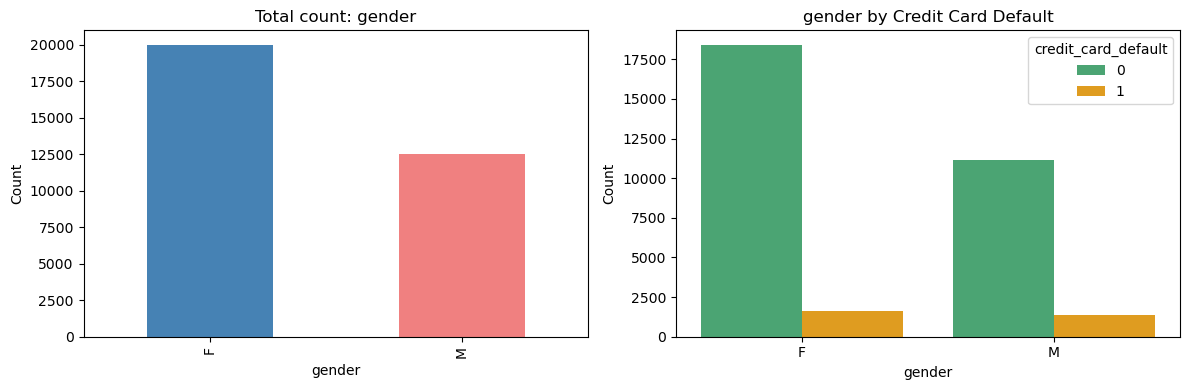

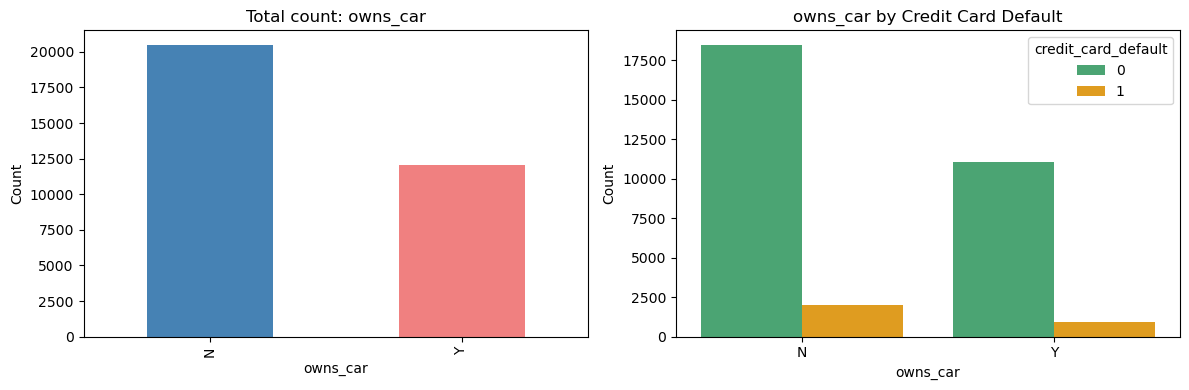

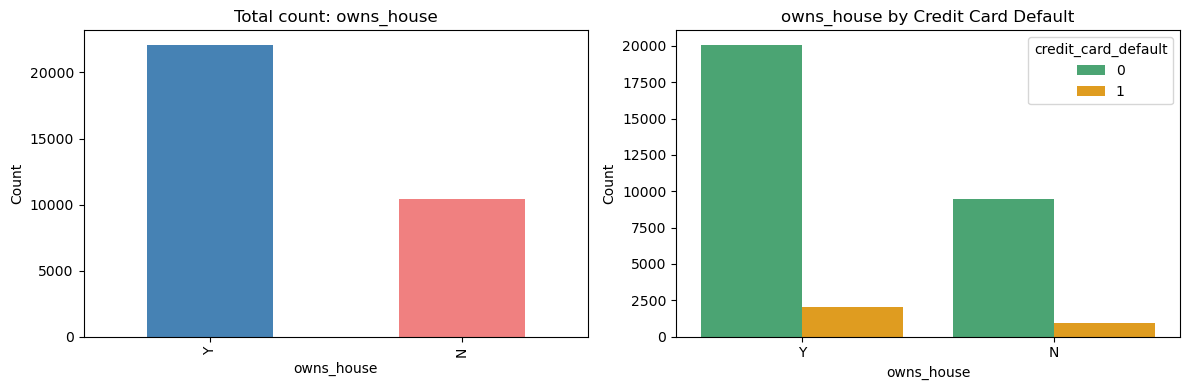

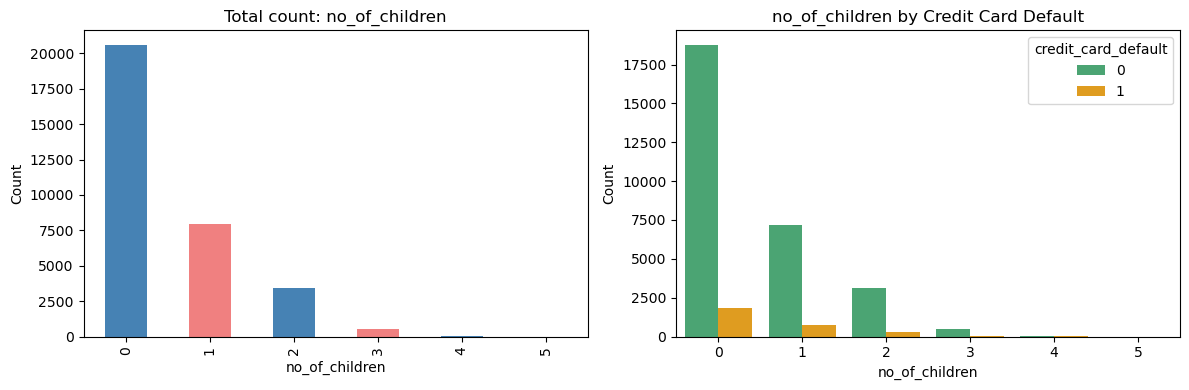

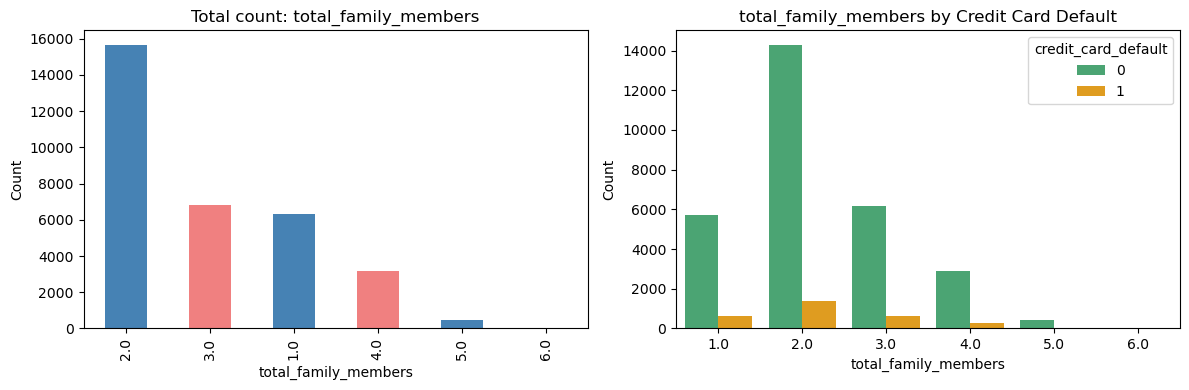

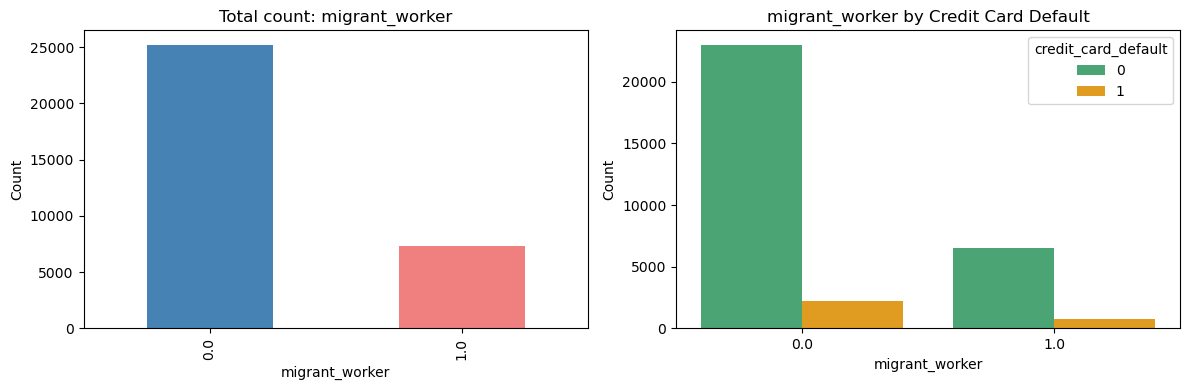

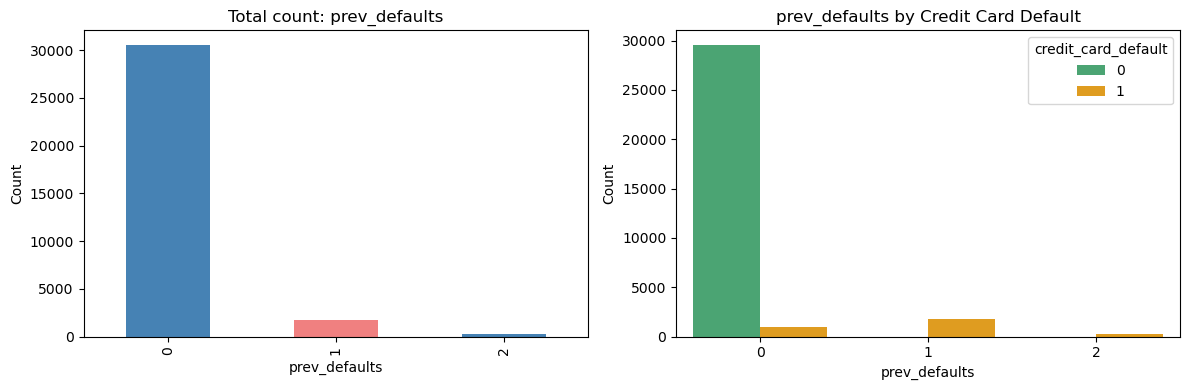

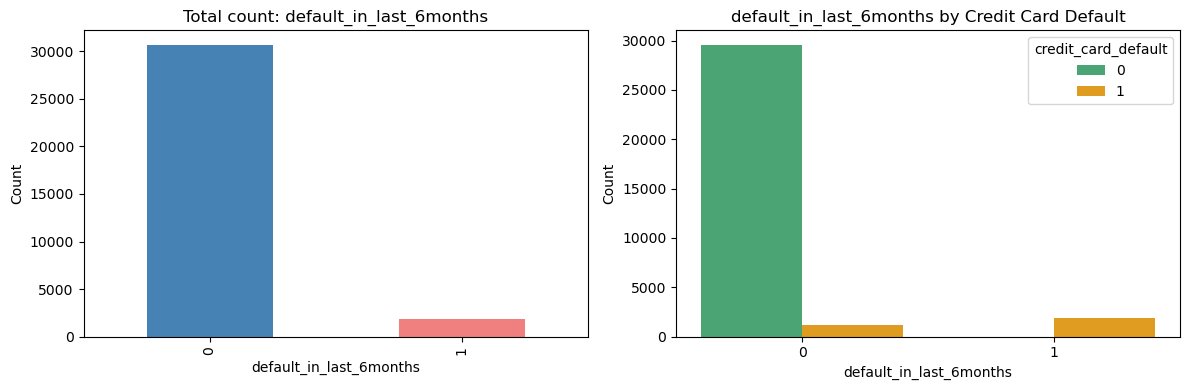

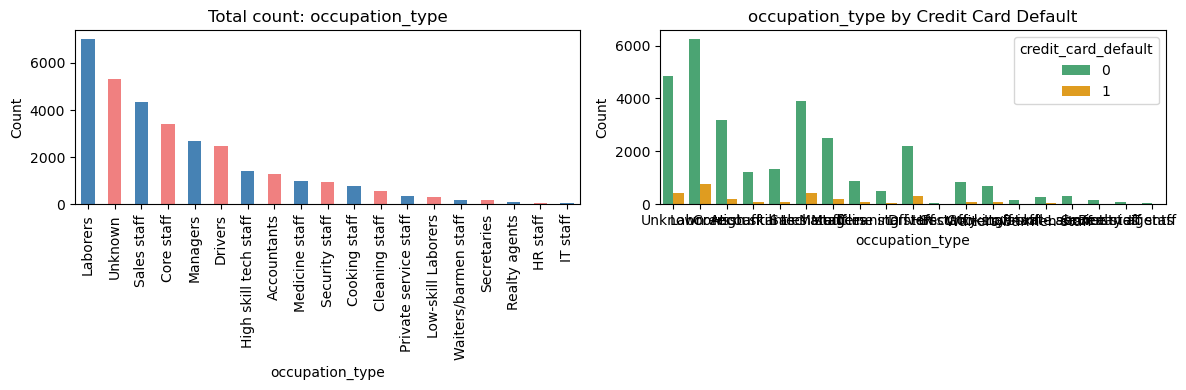

In [54]:
for col in cat_cols:
    plt.figure(figsize=(12,4))
    
    # 1. Total counts
    plt.subplot(1,2,1)
    df[col].value_counts(dropna=False).plot(kind='bar', color=['steelblue', 'lightcoral'])
    plt.title(f'Total count: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # 2. Counts by credit_card_default
    plt.subplot(1,2,2)
    sns.countplot(x=col, hue='credit_card_default', data=df,  palette=['mediumseagreen', 'orange'])
    plt.title(f'{col} by Credit Card Default')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

## Numerical Columns

In [55]:
num_cols = ['age', 'credit_limit_used(%)', 'credit_score', 'credit_limit_log', 
            'log_net_yearly_income', 'years_experience_log', 'yearly_debt_payments_log']

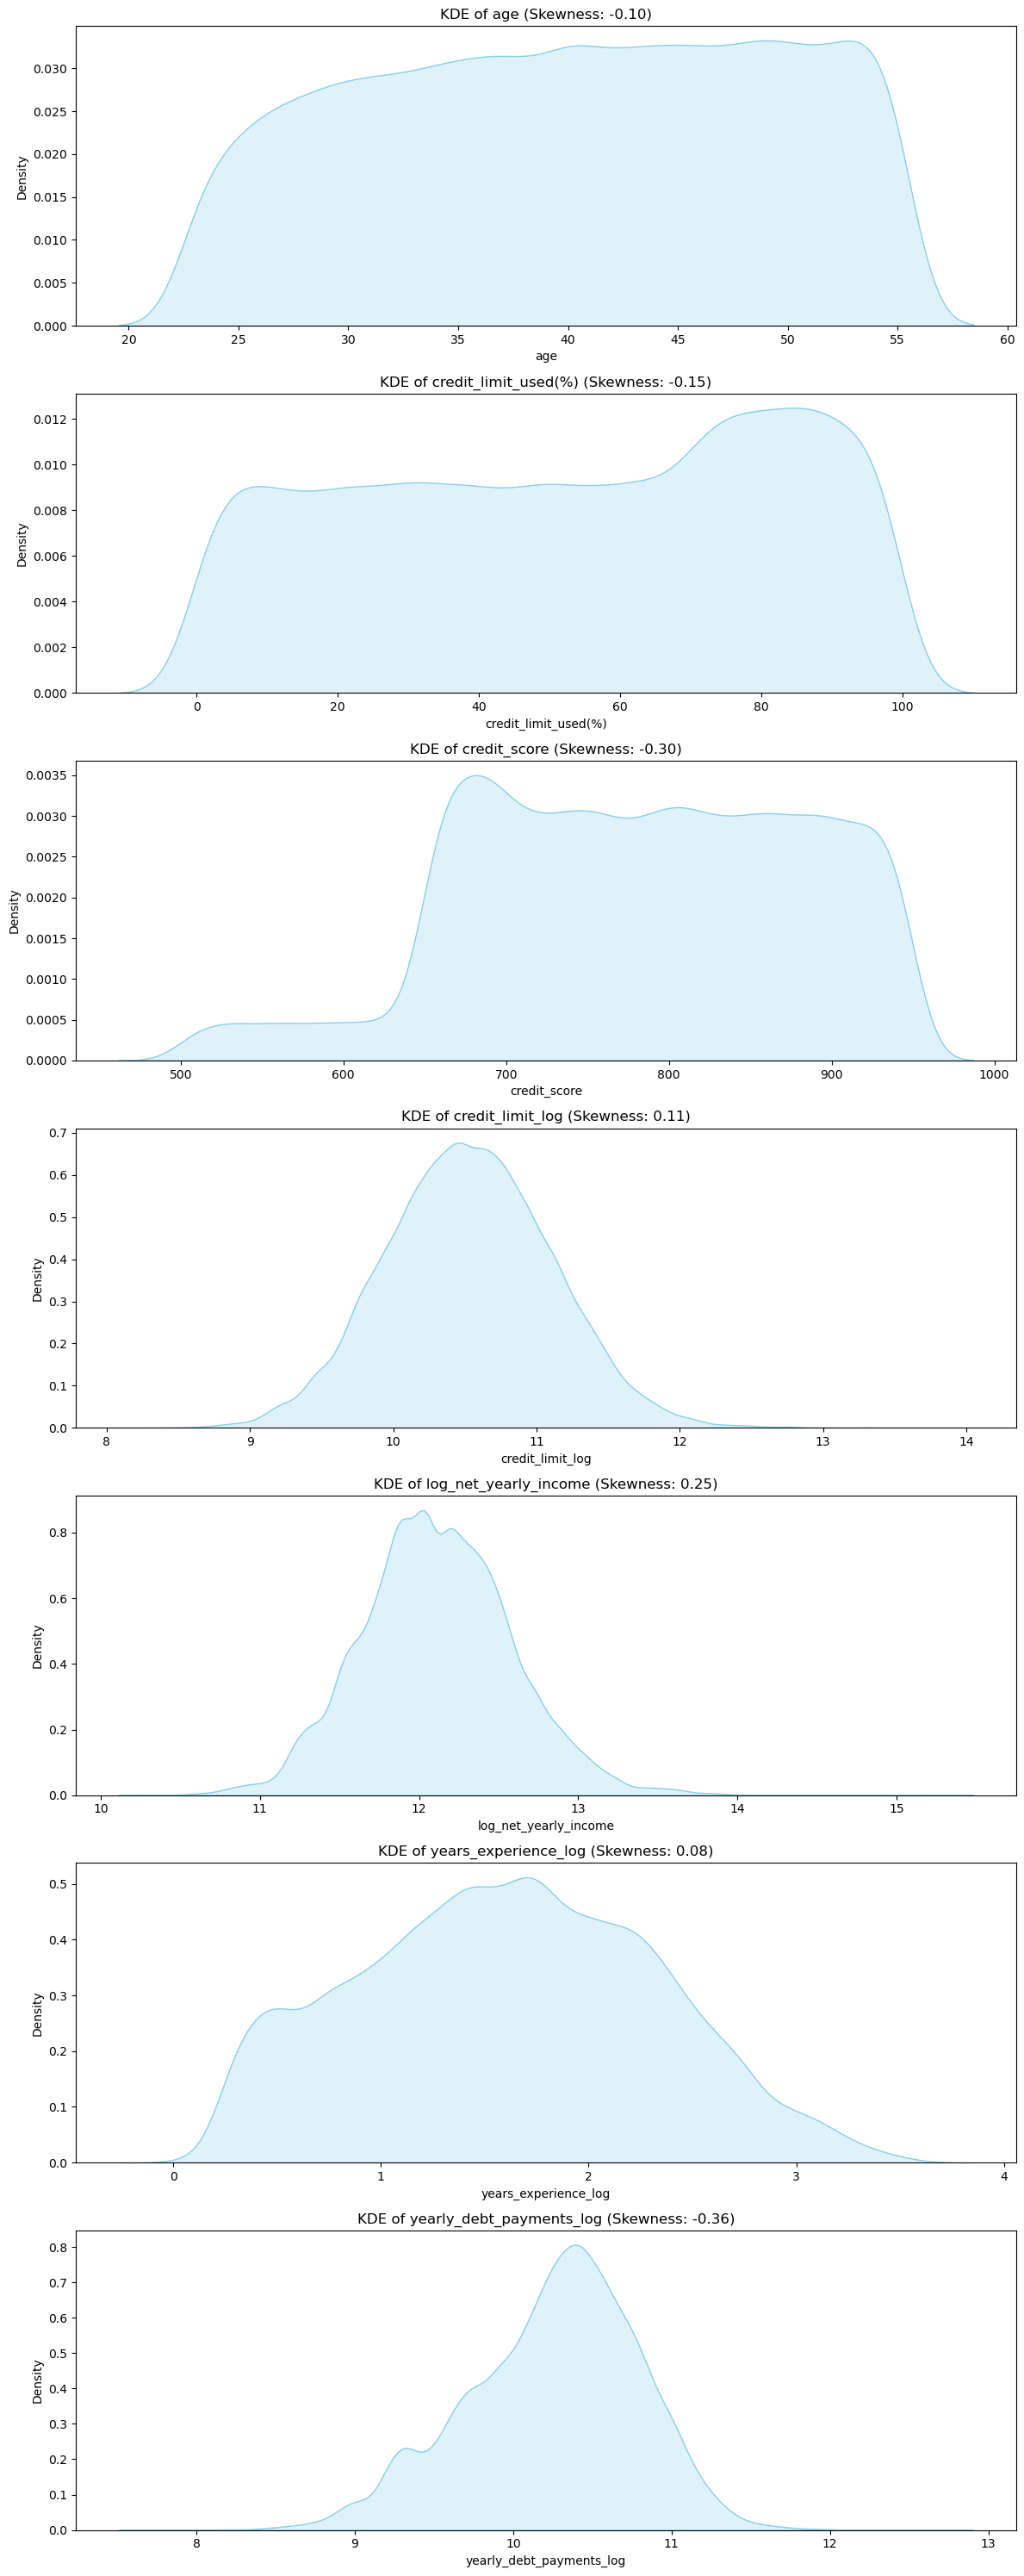

In [56]:
plt.figure(figsize=(12, 30))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.kdeplot(df[col], fill=True, color='skyblue')
    col_skew = df[col].skew()
    plt.title(f"KDE of {col} (Skewness: {col_skew:.2f})")

plt.tight_layout()
plt.show()

## Multivariate Analysis

In [57]:
df = df.drop(columns = ['no_of_days_employed', 'credit_limit', 'net_yearly_income', 'years_experience', 'yearly_debt_payments'])

<Axes: >

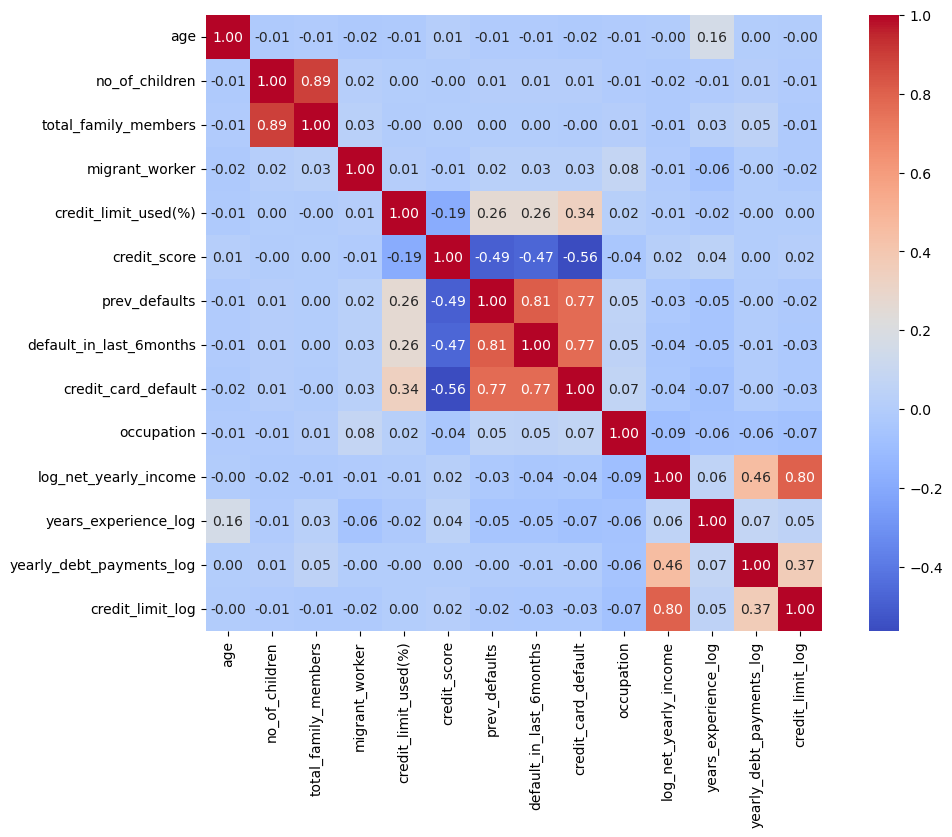

In [58]:
corr_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

## Multicollinearity Check

In [59]:
X = df[num_cols]
extra_cols = ['no_of_children', 'total_family_members', 'migrant_worker', 'prev_defaults', 'default_in_last_6months', 'occupation']
for col in extra_cols:
    X[col] = df[col]

# Add intercept column
X = sm.add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                     Feature         VIF
0                      const  864.023042
1                        age    1.028300
2       credit_limit_used(%)    1.087078
3               credit_score    1.344250
4           credit_limit_log    2.829784
5      log_net_yearly_income    3.098555
6       years_experience_log    1.049590
7   yearly_debt_payments_log    1.284340
8             no_of_children    5.026103
9       total_family_members    5.051675
10            migrant_worker    1.012189
11             prev_defaults    3.136720
12   default_in_last_6months    3.051508
13                occupation    1.022636


# Model Fitting

In [60]:
cat_cols1 = ['gender', 'owns_car', 'owns_house', 'no_of_children', 'total_family_members',
            'migrant_worker', 'prev_defaults', 'default_in_last_6months', 'occupation']
num_cols1 = ['age', 'credit_limit_used(%)', 'credit_score', 'credit_limit_log', 
            'log_net_yearly_income', 'years_experience_log', 'yearly_debt_payments_log']

In [61]:
X  = df[num_cols1 + cat_cols1]
y = df['credit_card_default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 26020
Number of rows in test data = 6505


## SMOTE

In [63]:
smote = SMOTENC(categorical_features = cat_cols1, random_state = 0)

X_train_resamp, y_train_resamp = smote.fit_resample(X_train, y_train)

In [64]:
print(f"No. of Observations before Resampling: {len(X_train)}")
print(f"No. of Observations after Resampling: {len(X_train_resamp)}")

No. of Observations before Resampling: 26020
No. of Observations after Resampling: 47294


## Encoding & Scaling using Pipeline

In [68]:
trf = ColumnTransformer([
    # One-hot encode selected categorical columns
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), 
     ['gender', 'owns_car', 'owns_house']),
    
    # Scale selected numeric columns
    ('scaling', StandardScaler(), 
     ['age', 'years_experience_log', 'yearly_debt_payments_log',
      'credit_limit_used(%)', 'credit_score', 'credit_limit_log', 'log_net_yearly_income'])
], remainder='passthrough')

## Logistic Regression

In [69]:
lg = LogisticRegression(max_iter = 500)


pipe = Pipeline([
    ('trf', trf),
    ('model', lg)
])


pipe.fit(X_train_resamp, y_train_resamp)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'owns_car',
                                                   'owns_house']),
                                                 ('scaling', StandardScaler(),
                                                  ['age',
                                                   'years_experience_log',
                                                   'yearly_debt_payments_log',
                                                   'credit_limit_used(%)',
                                                   'credit_score',
                                                   'credit_limit_log',
                                                   'log_net_yearly_income'])])),
                ('model', LogisticRegression(max_iter=500))])

Accuracy: 0.953727901614143
Precision: 0.6783980582524272
Recall: 0.9394957983193277
F1 Score: 0.7878787878787878


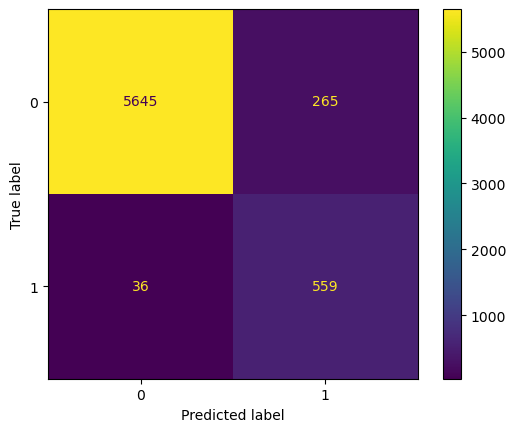

In [ ]:
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

print(f"Accuracy: {accuracy_score(y_test, y_pred)}") 
print(f"Precision: {precision_score(y_test, y_pred)}") 
print(f"Recall: {recall_score(y_test, y_pred)}") 
print(f"F1 Score: {f1_score(y_test, y_pred)}")

## Decision Tree

In [72]:
dt = DecisionTreeClassifier(min_samples_split = 450)

pipe = Pipeline([
    ('trf', trf),
    ('model', dt)
])

pipe.fit(X_train_resamp, y_train_resamp)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'owns_car',
                                                   'owns_house']),
                                                 ('scaling', StandardScaler(),
                                                  ['age',
                                                   'years_experience_log',
                                                   'yearly_debt_payments_log',
                                                   'credit_limit_used(%)',
                                                   'credit_score',
                                                   'credit_limit_log',
                                                   'log_net_yearly_income'])])),
                ('model', DecisionTreeClassifier(min_samples_split=450))])

Accuracy: 0.9592621060722522
Precision: 0.7057356608478803
Recall: 0.9512605042016806
F1 Score: 0.8103078024337866


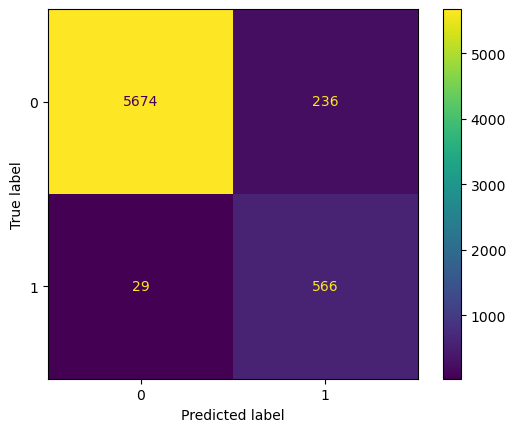

In [73]:
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

print(f"Accuracy: {accuracy_score(y_test, y_pred)}") 
print(f"Precision: {precision_score(y_test, y_pred)}") 
print(f"Recall: {recall_score(y_test, y_pred)}") 
print(f"F1 Score: {f1_score(y_test, y_pred)}")

## Random Forest

In [74]:
rf = RandomForestClassifier(min_samples_split = 450)

pipe = Pipeline([
    ('trf', trf),
    ('model', rf)
])

pipe.fit(X_train_resamp, y_train_resamp)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['gender', 'owns_car',
                                                   'owns_house']),
                                                 ('scaling', StandardScaler(),
                                                  ['age',
                                                   'years_experience_log',
                                                   'yearly_debt_payments_log',
                                                   'credit_limit_used(%)',
                                                   'credit_score',
                                                   'credit_limit_log',
                                                   'log_net_yearly_income'])])),
                ('model', RandomForestClassifier(min_samples_split=450))])

Accuracy: 0.9572636433512682
Precision: 0.6862514688601645
Recall: 0.9815126050420168
F1 Score: 0.8077455048409405


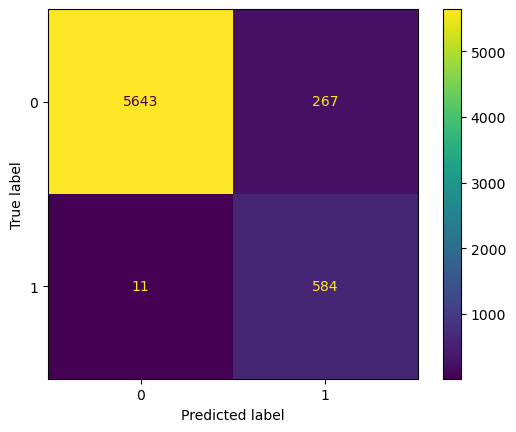

In [75]:
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

print(f"Accuracy: {accuracy_score(y_test, y_pred)}") 
print(f"Precision: {precision_score(y_test, y_pred)}") 
print(f"Recall: {recall_score(y_test, y_pred)}") 
print(f"F1 Score: {f1_score(y_test, y_pred)}")